In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
tier = 'ball'
eval_setup = 'ball_cross_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [3]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [5]:
from dqn import DQNAgent

DEBUG:root:test


In [6]:
agent = DQNAgent()

### Load Model

In [7]:
model = agent.build_model()
#new_model = TestModel()
model.load_state_dict(torch.load("./model/test_model.pth"))
state = dict(model =model, cache = cache)

### 3. Train the Agent

In [ ]:
state, statistic = agent.train(cache, train, tier, test)

INFO:root:Preprocess the training data
INFO:root:Train set: size=110166381, solved_ratio=1.50%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
DEBUG:root:Iter: 1000, examples: 16000, mean loss: 0.025643, speed: 2.2 batch/sec, lr: 0.000300


In [11]:
#num = -2:

max_loss = statistic['max_loss']
print(max_loss[-10:])
min_loss = statistic['min_loss']
print(min_loss[-10:])
mean_loss = statistic['mean_loss']
print(mean_loss[-10:])
max_loss_index= statistic['max_loss_index']
print(max_loss_index[-10:])
min_loss_index= statistic['min_loss_index']
print(min_loss_index[-10:]) 
max_loss_action = statistic['max_loss_action']
print(max_loss_action[-10:])
min_loss_action = statistic['min_loss_action']
print(min_loss_action[-10:])
loss_var = statistic['loss_var']
print(loss_var[-10:])

i=1
a = max_loss_index[-10:][i].item()
b = max_loss_action[-10:][i].cpu().numpy()

print(a, b)

[0.03320382535457611, 0.033439744263887405, 0.009244760498404503, 0.005014820024371147, 0.01441860944032669, 0.027788866311311722, 0.0060747056268155575, 0.006570657715201378, 0.0025360353756695986, 0.008189576677978039]
[4.812127735931426e-05, 1.8230917703476734e-05, 4.3439889850560576e-05, 2.560955545050092e-05, 3.766852387343533e-05, 3.0618408345617354e-05, 3.3130265364889055e-05, 1.6824538761284202e-05, 6.375053635565564e-05, 3.60221674782224e-05]
[0.003455528523772955, 0.0034277925733476877, 0.0011177768465131521, 0.00080771156353876, 0.0020106458105146885, 0.003053641179576516, 0.0011018295772373676, 0.0010769987711682916, 0.001038591144606471, 0.0014230918604880571]
[tensor(470), tensor(835), tensor(813), tensor(975), tensor(17), tensor(1500), tensor(1177), tensor(830), tensor(1229), tensor(1417)]
[tensor(319), tensor(992), tensor(173), tensor(988), tensor(11), tensor(179), tensor(236), tensor(6), tensor(23), tensor(215)]
[tensor([0.9902, 0.8700, 0.0053], device='cuda:0'), tenso

### Visualize

In [26]:
task_ids = [test[320]]
action = np.array([0.5 ,0.7 ,0.51880586])
images, predict_images = agent.predict_qa(state, task_ids, tier, action)

> /home/mynsng/phyre-graph/neural_model.py(260)predict_qa()
-> obs_predict = np.zeros((16, 256, 256), dtype = int)


(Pdb)  c


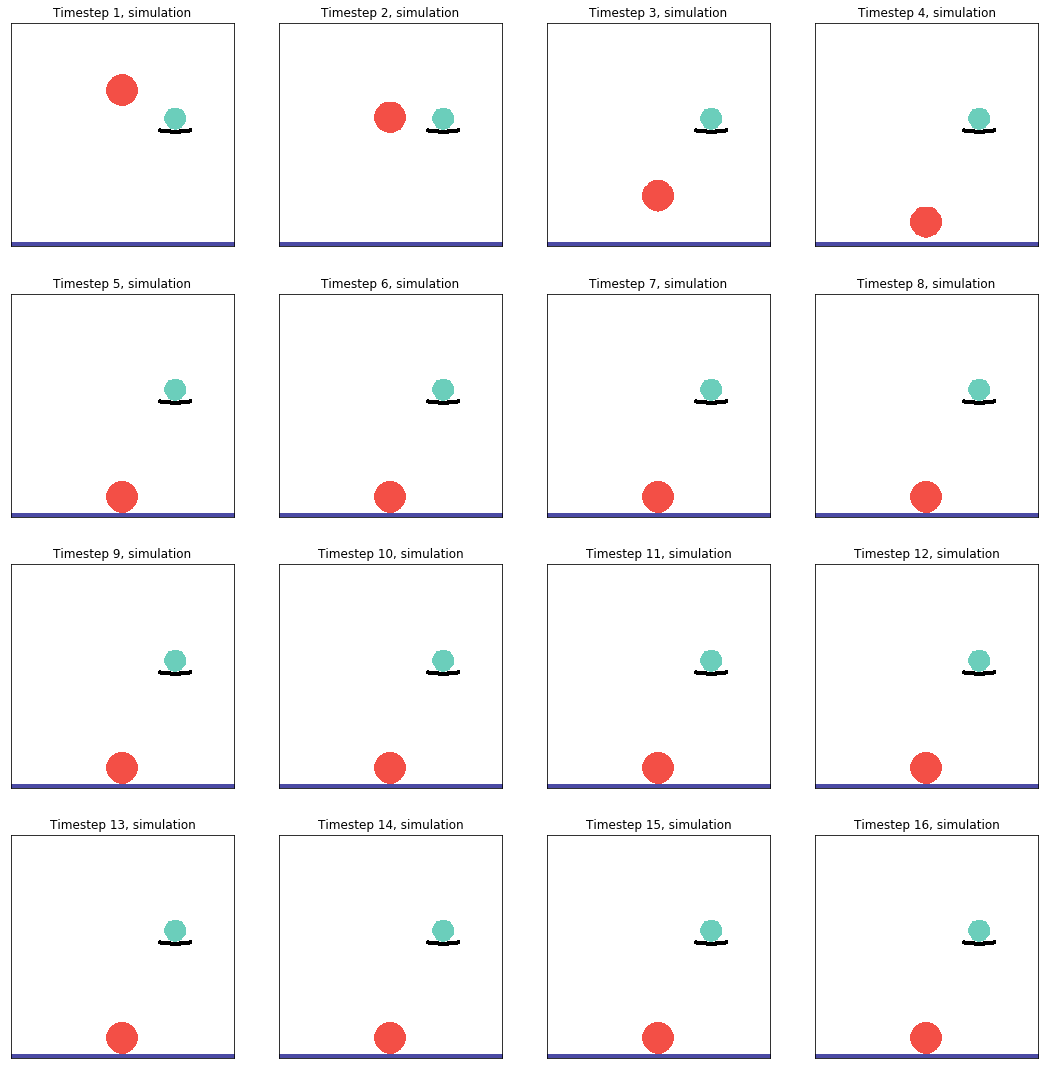

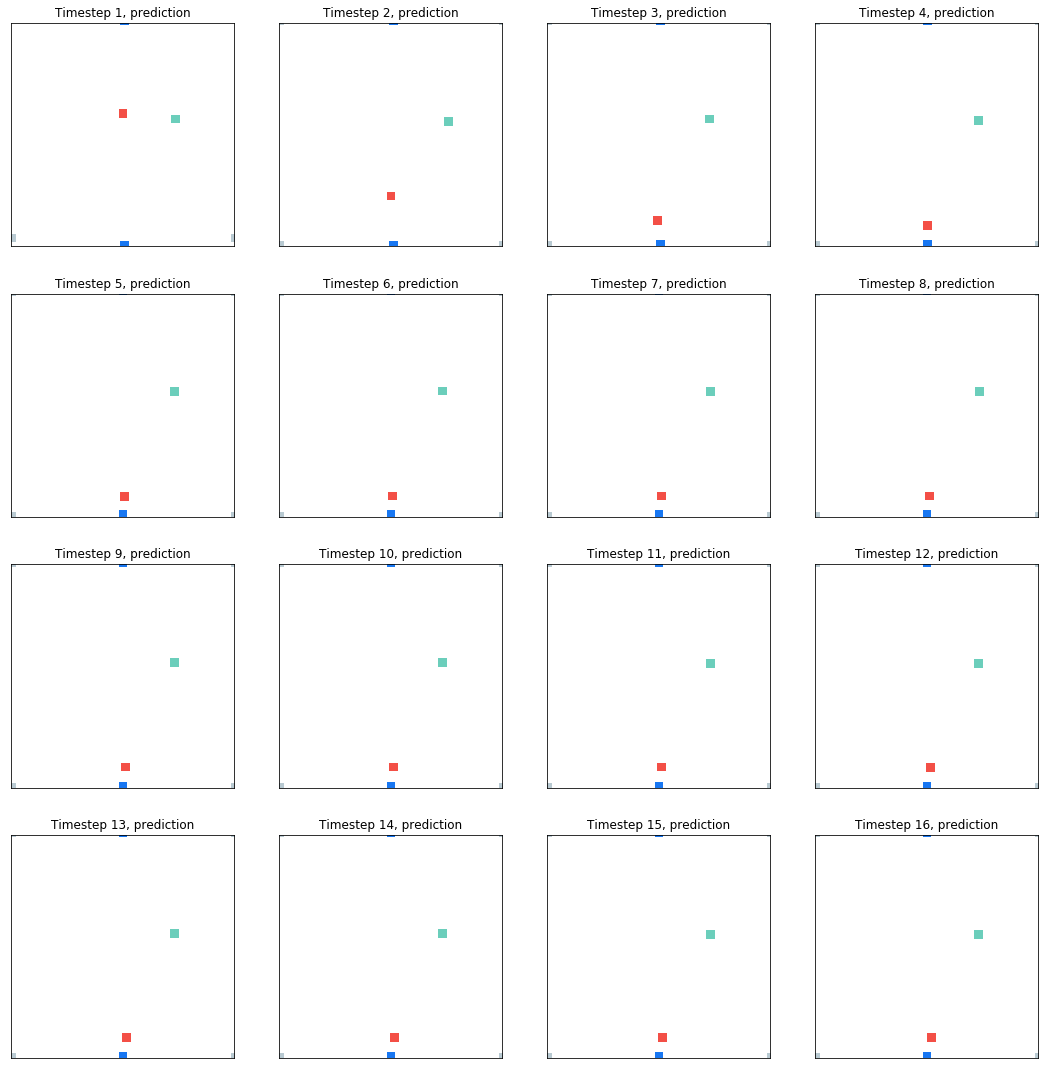

In [27]:
# plot할 개수 설정
fig1, axs1 = plt.subplots(4, 4, figsize=(15, 15))
fig1.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig2, axs2 = plt.subplots(4, 4, figsize=(15, 15))
fig2.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plot 해보리기~~
for i, (ax, image) in enumerate(zip(axs1.flatten(), images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, simulation')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
for i, (ax, image) in enumerate(zip(axs2.flatten(), predict_images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, prediction')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

### 4. Evaluate the Agent

#### 4.1 Percentage of solved tasks per number of attempts

In [8]:
loss = agent.get_test_loss(state, test, tier)
print(loss)


/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


0.0005203088462621963


#### 4.2 AUCESS

In [15]:
model  = state['model']

# save
savePath = "./model/test_model_cross.pth"
torch.save(model.state_dict(), savePath)

# load
#new_model = TestModel()
#new_model.load_state_dict(torch.load("./output/test_model.pth"))